## Checking my model with the 6D data from Carlin 2018

In [64]:
from galpy.orbit import Orbit
from galpy.potential import MWPotential2014
from galpy.util import conversion
import numpy as np
import matplotlib.pyplot as plt

In [65]:
## Expected results:
plow, alow = 12.6, 193
phigh, ahigh = 10.6, 88.9

In [118]:
# sixD = [ra, dec, dist, pmra, pmdec, rvel]
to = conversion.time_in_Gyr(ro = 8., vo = 220.)

# Note, can't find explicit RA & Dec for this paper?
sixD = [209.3, 26.8, 46.5, -1.14, -0.98, 197.5]

o = Orbit(sixD, ro=8., vo=220., radec=True)

## For low-mass potential

In [119]:
deltb = np.linspace(0, -5/to, 1000)
deltf = np.linspace(0, 5/to, 1000)

obwd = o()
ofwd = o()
obwd.integrate(deltb, MWPotential2014)
ofwd.integrate(deltf, MWPotential2014)

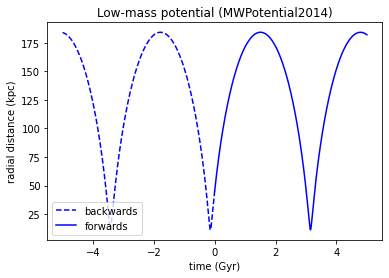

In [120]:
plt.plot(deltb*to, obwd.r(deltb), 'b--', label='backwards')
plt.plot(deltf*to, ofwd.r(deltf), 'b-', label='forwards')
plt.legend()
plt.xlabel('time (Gyr)')
plt.ylabel('radial distance (kpc)')
plt.title('Low-mass potential (MWPotential2014)');

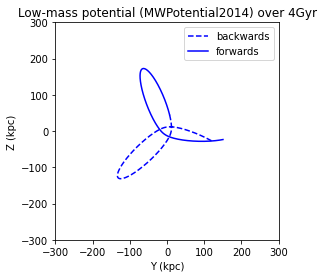

In [121]:
fig = plt.figure(figsize = (4,4))

plt.plot(obwd.y(deltb[:800]), obwd.z(deltb[:800]),'b--', label='backwards')
plt.plot(ofwd.y(deltf[:800]), ofwd.z(deltf[:800]), 'b-', label='forwards')
plt.legend()
plt.xlabel('Y (kpc)')
plt.ylabel('Z (kpc)')
plt.xlim(-300,300)
plt.ylim(-300,300)
plt.title('Low-mass potential (MWPotential2014) over 4Gyr');

In [122]:
print('my pericentre:', obwd.rperi(), 'vs. Carlin pericentre:', plow)
print('my apocentre:', obwd.rap(), 'vs. Carlin apocentre:', alow)
print('my eccentricity:', obwd.e(), 'vs. Carlin eccentricity:', 0.88)

my pericentre: 11.059934577773014 vs. Carlin pericentre: 12.6
my apocentre: 184.34096597384612 vs. Carlin apocentre: 193
my eccentricity: 0.8867975065974549 vs. Carlin eccentricity: 0.88


## For high-mass potential

In [123]:
deltb = np.linspace(0, -5/to, 1000)
deltf = np.linspace(0, 5/to, 1000)

obwdH = o()
ofwdH = o()

potH = MWPotential2014.copy()
potH[2] *=2
obwdH.integrate(deltb, potH)
ofwdH.integrate(deltf, potH)

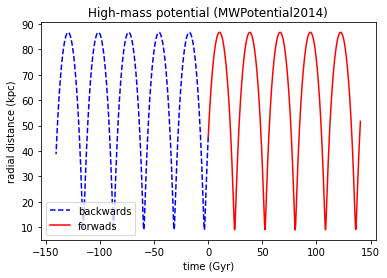

In [124]:
plt.plot(deltb, obwdH.r(deltb), 'b--', label='backwards')
plt.plot(deltf, ofwdH.r(deltf), 'r-', label='forwads')
plt.legend()
plt.xlabel('time (Gyr)')
plt.ylabel('radial distance (kpc)')
plt.title('High-mass potential (MWPotential2014)');

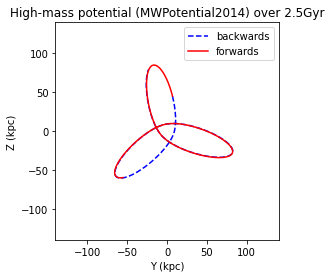

In [125]:
fig = plt.figure(figsize = (4,4))

plt.plot(obwdH.y(deltb[:500]), obwdH.z(deltb[:500]),'b--', label='backwards')
plt.plot(ofwdH.y(deltf[:500]), ofwdH.z(deltf[:500]), 'r-', label='forwards')
plt.legend()
plt.xlabel('Y (kpc)')
plt.ylabel('Z (kpc)')
plt.xlim(-140,140)
plt.ylim(-140,140)
plt.title('High-mass potential (MWPotential2014) over 2.5Gyr');

In [126]:
print('my pericentre:', obwdH.rperi(), 'vs. Carlin pericentre:', phigh)
print('my apocentre:', obwdH.rap(), 'vs. Carlin apocentre:', ahigh)
print('my eccentricity:', obwdH.e(), 'vs. Carlin eccentricity:', 0.79)

my pericentre: 8.934174437314994 vs. Carlin pericentre: 10.6
my apocentre: 86.69508898806073 vs. Carlin apocentre: 88.9
my eccentricity: 0.8131497803643176 vs. Carlin eccentricity: 0.79
